# Reporting on sales data
### By Yusira Mutholib and Zainab Popoola

## 📖 Background
We work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

We’ve recently learned data manipulation and plotting, and suggest helping our colleague analyze past sales data. Our colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

## Importing Packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [2]:
df = pd.read_csv('sales_data.csv')

## Assessing the data

In [3]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1000 non-null   object 
 1   warehouse     1000 non-null   object 
 2   client_type   1000 non-null   object 
 3   product_line  1000 non-null   object 
 4   quantity      1000 non-null   int64  
 5   unit_price    1000 non-null   float64
 6   total         1000 non-null   float64
 7   payment       1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [6]:
df.isna().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

**There are no null values in the dataset**

In [7]:
df.duplicated().sum()

0

**There are no duplicated rows in the dataset**

In [8]:
df['warehouse'].value_counts()

Central    480
North      340
West       180
Name: warehouse, dtype: int64

In [9]:
df['client_type'].value_counts()

Retail       775
Wholesale    225
Name: client_type, dtype: int64

In [10]:
df['product_line'].value_counts()

Breaking system          230
Suspension & traction    228
Electrical system        193
Frame & body             166
Miscellaneous            122
Engine                    61
Name: product_line, dtype: int64

In [11]:
df['payment'].value_counts()

Credit card    659
Transfer       225
Cash           116
Name: payment, dtype: int64

## Cleaning the data

In [12]:
#Converting the date column from object to datetime format
df['date'] = pd.to_datetime(df['date'])

In [13]:
#Creating a month column from the date column
df['month']= pd.DatetimeIndex(df['date']).month
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)

In [14]:
df.month.value_counts()

Jul    345
Jun    338
Aug    317
Name: month, dtype: int64

## Exploratory Data Analysis

### Question 1: What are the total sales for each payment method?

In [15]:
total_by_payment = df.groupby('payment').sum()[['total']].sort_values(by='total', ascending=False)
total_by_payment

,total
payment,
Transfer,159642.33
Credit card,110271.57
Cash,19199.10


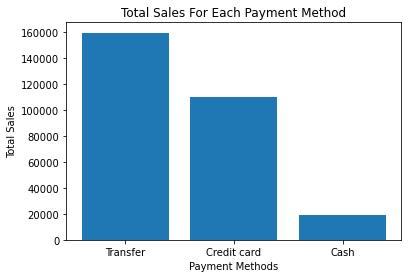

In [16]:
plt.bar(x=total_by_payment.index, height=total_by_payment['total'])
plt.xlabel('Payment Methods')
plt.ylabel('Total Sales')
plt.title('Total Sales For Each Payment Method')
plt.show()

**Transfer payment method had the highest total sales**

### Question 2: What are the total quanities purchased using each payment method?

In [17]:
quantity_by_payment = df.groupby('payment').sum()[['quantity']].sort_values(by='quantity', ascending=False)
quantity_by_payment

,quantity
payment,
Transfer,5180
Credit card,3588
Cash,627


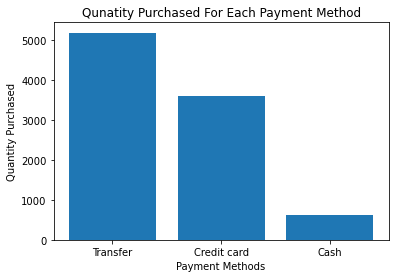

In [18]:
plt.bar(x=quantity_by_payment.index, height=quantity_by_payment['quantity'])
plt.xlabel('Payment Methods')
plt.ylabel('Quantity Purchased')
plt.title('Qunatity Purchased For Each Payment Method')
plt.show()

**Transfer payment method had the highest quantity purchased**

### Question 3: What are the average unit price for each product line?

In [19]:
avg_unit_price = df.groupby('product_line').mean()[['unit_price']].sort_values(by='unit_price')
avg_unit_price

,unit_price
product_line,
Breaking system,17.740522
Miscellaneous,22.810738
Electrical system,25.585130
Suspension & traction,33.969868
Frame & body,42.832229
Engine,60.091803


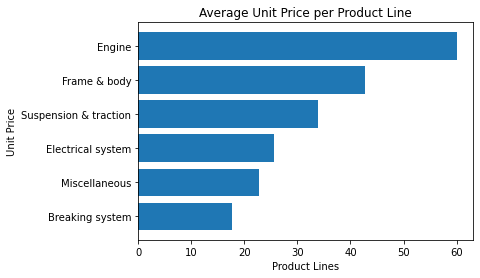

In [20]:
plt.barh(y=avg_unit_price.index, width=avg_unit_price['unit_price'])
plt.xlabel('Product Lines')
plt.ylabel('Unit Price')
plt.title('Average Unit Price per Product Line')
plt.show()

**Engine products have the highest average unit price**

### Question 4: What are the total sales for each product line?

In [21]:
total_sales_by_product = df.groupby('product_line').sum()[['total']].sort_values(by='total')
total_sales_by_product

,total
product_line,
Miscellaneous,27165.82
Engine,37945.38
Breaking system,38350.15
Electrical system,43612.71
Frame & body,69024.73
Suspension & traction,73014.21


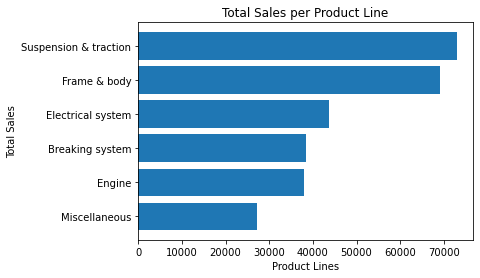

In [22]:
plt.barh(y=total_sales_by_product.index, width=total_sales_by_product['total'])
plt.xlabel('Product Lines')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Line')
plt.show()

**Suspension & Traction had the highest total sales of all the products**

### Question 5: What are the total quantities purchased in each product line?

In [23]:
quantity_by_product = df.groupby('product_line').sum()[['quantity']].sort_values(by='quantity').sort_values(by='quantity')
quantity_by_product

,quantity
product_line,
Engine,627
Miscellaneous,1176
Frame & body,1619
Electrical system,1698
Breaking system,2130
Suspension & traction,2145


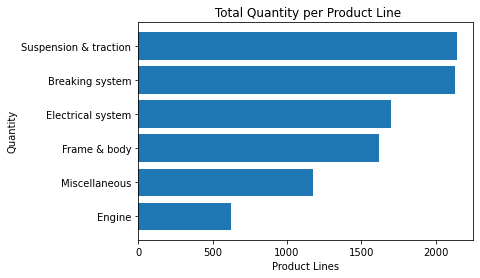

In [24]:
plt.barh(y=quantity_by_product.index, width=quantity_by_product['quantity'])
plt.xlabel('Product Lines')
plt.ylabel('Quantity')
plt.title(' Total Quantity per Product Line')
plt.show()

**Suspension & Traction also had the highest quantity purchased of all the products**

### Question 6: What are the proportions of client types?

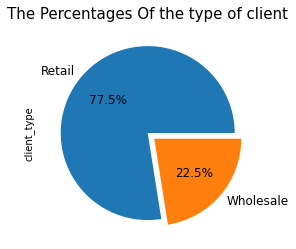

In [25]:
df['client_type'].value_counts().plot(kind="pie", fontsize=12, autopct="%1.1f%%", explode=[0.0, 0.1])
plt.title("The Percentages Of the type of client", fontsize=15)
plt.show()

### Question 7: What is the average sale for each client type?

In [26]:
avg_sales_by_client = df.groupby('client_type').mean()[['total']].sort_values(by='total', ascending=False)
avg_sales_by_client

,total
client_type,
Wholesale,709.521467
Retail,167.058929


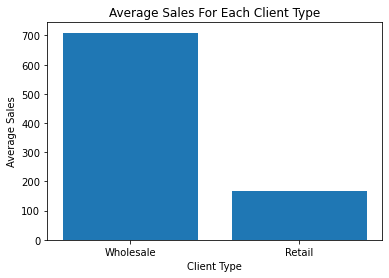

In [27]:
plt.bar(x=avg_sales_by_client.index, height=avg_sales_by_client['total'])
plt.xlabel('Client Type')
plt.ylabel('Average Sales')
plt.title('Average Sales For Each Client Type')
plt.show()

**Wholesale clients had the highest total sales**

### Question 8: What is the quantity sold for each client type?

In [28]:
avg_quantity_by_client = df.groupby('client_type').mean()[['quantity']].sort_values(by='quantity', ascending=False)
avg_quantity_by_client

,quantity
client_type,
Wholesale,23.022222
Retail,5.438710


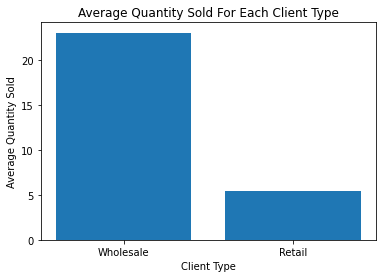

In [29]:
plt.bar(x=avg_quantity_by_client.index, height=avg_quantity_by_client['quantity'])
plt.xlabel('Client Type')
plt.ylabel('Average Quantity Sold')
plt.title('Average Quantity Sold For Each Client Type')
plt.show()

**Wholesale clients also purchased the highest number of quantities**

### Question 9: What the total sales by Warehouse Location for Each Client Type

In [30]:
df_group = df.groupby(['warehouse','client_type']).sum()[['total']].unstack()
df_group

total          
client_type    Retail Wholesale
warehouse                      
Central      63126.12  78856.76
North        42137.36  58066.27
West         24207.19  22719.30

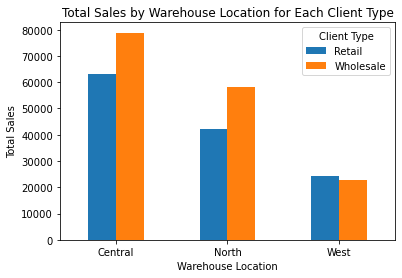

In [31]:
df_group.plot(kind='bar')
plt.xlabel('Warehouse Location')
plt.ylabel('Total Sales')
plt.title('Total Sales by Warehouse Location for Each Client Type')
plt.xticks(rotation=0)
plt.legend(['Retail', 'Wholesale'], title='Client Type')
plt.show()

**Wholesale clients had the most sales in the Central and North warehouse regions but not in the West warehouse region**

### Question 10: What is the total sale for each warehouse location?

In [32]:
total_sales_by_warehouse = df.groupby('warehouse').sum()[['total']].sort_values(by='total', ascending=False)
total_sales_by_warehouse

,total
warehouse,
Central,141982.88
North,100203.63
West,46926.49


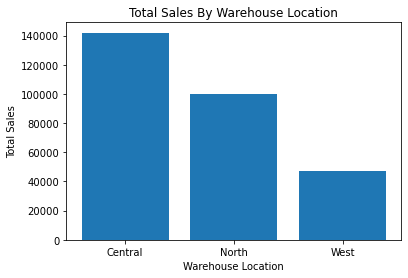

In [33]:
plt.bar(x=total_sales_by_warehouse.index, height=total_sales_by_warehouse['total'])
plt.xlabel('Warehouse Location')
plt.ylabel('Total Sales')
plt.title('Total Sales By Warehouse Location')
plt.show()

**Central warehouse had the highest total sales**

### Question 11: What is the total quantity purchased for each warehouse location?

In [34]:
quantity_by_warehouse = df.groupby('warehouse').sum()[['quantity']].sort_values(by='quantity', ascending=False)
quantity_by_warehouse

,quantity
warehouse,
Central,4527
North,3254
West,1614


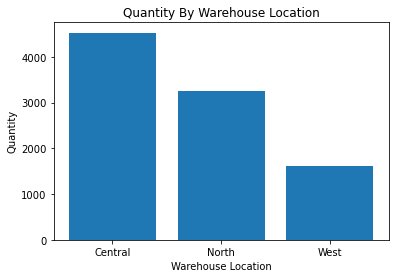

In [35]:
plt.bar(x=quantity_by_warehouse.index, height=quantity_by_warehouse['quantity'])
plt.xlabel('Warehouse Location')
plt.ylabel('Quantity')
plt.title('Quantity By Warehouse Location')
plt.show()

**Central warehouse also sold the highest quantity of products**

### Question 12: What are the total sales by product in each region

In [36]:
df_groups = df.groupby(['product_line', 'warehouse']).sum()['total'].unstack()
df_groups

warehouse,Central,North,West
product_line,,,
Breaking system,17792.53,10588.13,9969.49
Electrical system,21994.56,15247.27,6370.88
Engine,27263.14,7236.73,3445.51
Frame & body,30040.56,28397.86,10586.31
Miscellaneous,12220.88,8618.67,6326.27
Suspension & traction,32671.21,30114.97,10228.03


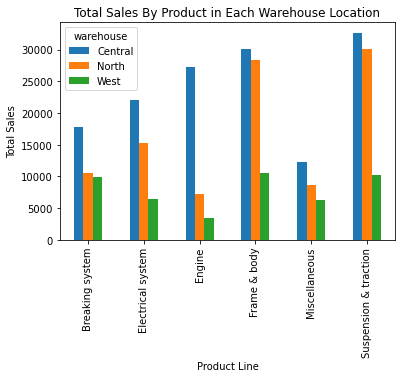

In [37]:
df_groups.plot(kind='bar')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales By Product in Each Warehouse Location')
plt.show()

**The central warehouse had the highest total sales across all product lines**

### Multivariate Analysis of the Correlation Between the Numerical Columns in the dataset

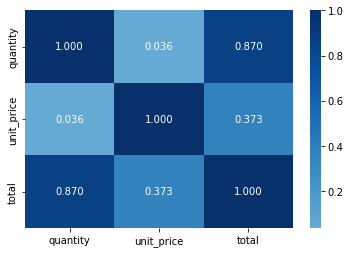

In [38]:
sns.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = "Blues", center=0)
plt.show()

### Question 13: What is the correlation between unit price of each product and the total sales

In [39]:
df['unit_price'].corr(df['total'])

0.3729422796236055

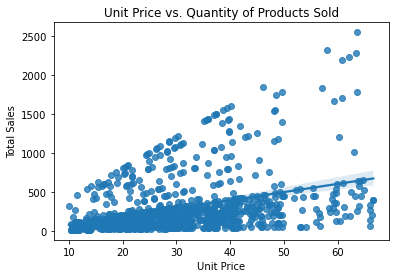

In [40]:
sns.regplot(data=df, x='unit_price', y='total')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.title('Unit Price vs. Quantity of Products Sold')
plt.show()

### Question 14: What is the correlation between quantity of products sold and the total sales

In [41]:
df['quantity'].corr(df['total'])

0.8702074571201321

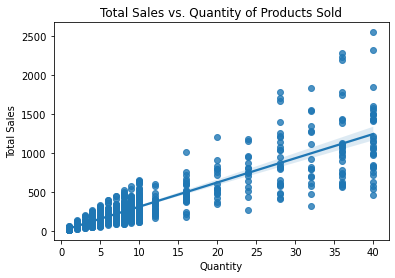

In [42]:
sns.regplot(data=df, x='quantity', y='total')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.title('Total Sales vs. Quantity of Products Sold')
plt.show()

### Question 15: Analysis of total sales by date 

In [43]:
sales_by_date = df.groupby('date').sum()[['total']]
sales_by_date.head(10)

,total
date,
2021-06-01,5378.29
2021-06-02,1297.14
2021-06-03,1054.85
2021-06-04,899.40
2021-06-05,2893.56
2021-06-06,4304.73
2021-06-07,2519.71
2021-06-08,5073.56
2021-06-09,2391.44


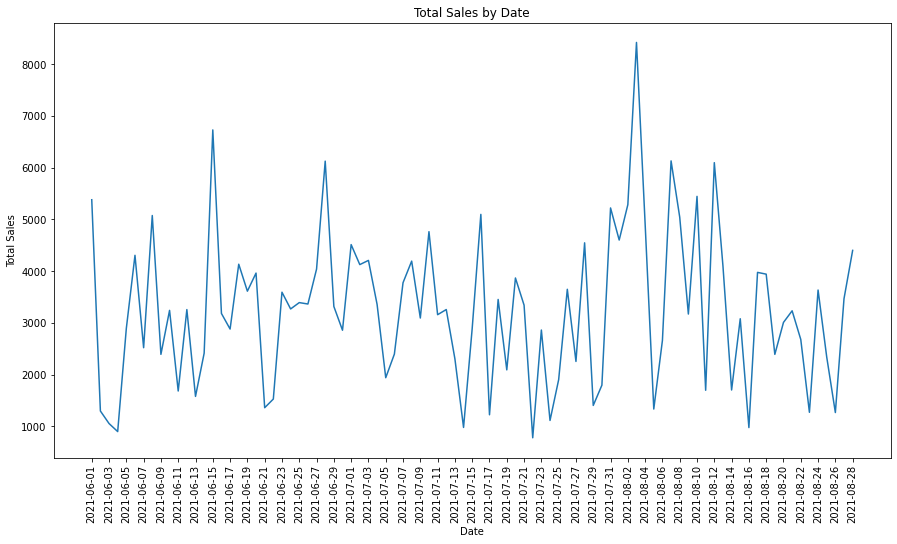

In [44]:
plt.figure(figsize = (15, 8))
plt.plot(sales_by_date.index, sales_by_date['total'])
plt.xticks(sales_by_date.index[::2], rotation=90)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Date')
plt.show()

**The highest sales were recorded on the 3rd of August and then 15th of June, 2021. From the line graph, there is always a peak of sales around the middle of each month, as evidenced by the sales on the 15th of June, 16th of July, 12th of August, 2021**

## Question 16: Analysis of total sales by month

In [45]:
months = ['Jun', 'Jul', 'Aug']
sales_by_month = df.groupby('month').sum()[['total']].reindex(months)
sales_by_month

,total
month,
Jun,95320.03
Jul,93547.91
Aug,100245.06


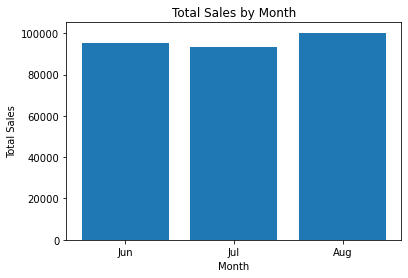

In [46]:
plt.bar(x=sales_by_month.index, height=sales_by_month['total'])
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month")
plt.show()

**The highest total sales was recorded during the month of August**

### Question 17: Analysis of Sales by Month for Each Client Type

In [47]:
df_group2 = df.groupby(['month','client_type']).sum()[['total']].unstack().reindex(months)
df_group2

total          
client_type    Retail Wholesale
month                          
Jun          46220.15  49099.88
Jul          44461.80  49086.11
Aug          38788.72  61456.34

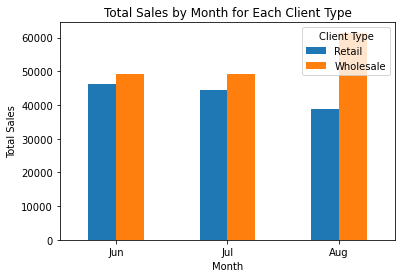

In [48]:
df_group2.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month for Each Client Type')
plt.xticks(rotation=0)
plt.legend(['Retail', 'Wholesale'], title='Client Type')
plt.show()

**August had the highest sales among all 3 months, with the highest wholesales even though it recorded the lowest retail sales**

### Question 18: Analysis of Sales by Client Type for Each Date

In [49]:
# Dates that didn't record any wholesales
df_group3 = df.groupby(['date','client_type']).sum()[['total']].unstack()
df_group3[df_group3['total']['Wholesale'].isnull()]

total          
client_type   Retail Wholesale
date                          
2021-06-02   1297.14       NaN
2021-06-03   1054.85       NaN
2021-06-04    899.40       NaN
2021-07-17   1224.08       NaN
2021-07-22    779.57       NaN
2021-07-24   1114.71       NaN

**There are 6 days that recorded no retail sales, and these days are among the lowest days by sales**

In [50]:
df_group4 = df.groupby(['date','client_type']).sum()[['total']].unstack()
df_group4

total          
client_type   Retail Wholesale
date                          
2021-06-01   1698.18   3680.11
2021-06-02   1297.14       NaN
2021-06-03   1054.85       NaN
2021-06-04    899.40       NaN
2021-06-05   1435.10   1458.46
...              ...       ...
2021-08-24    486.32   3147.38
2021-08-25   1111.91   1228.75
2021-08-26    929.42    337.80
2021-08-27   1817.99   1649.14
2021-08-28   1171.96   3227.74

[89 rows x 2 columns]

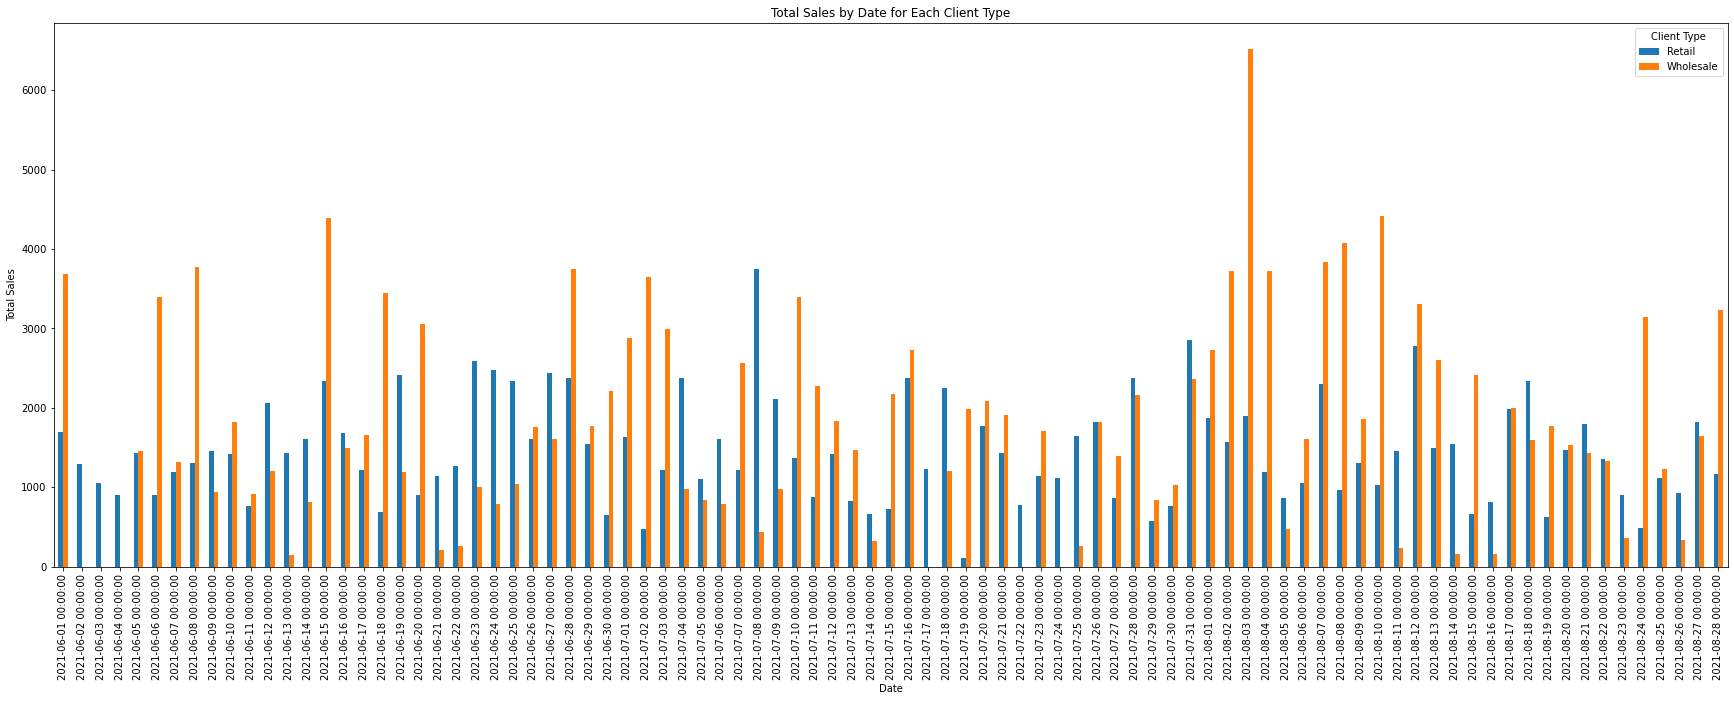

In [51]:
df_group4.plot(kind='bar', figsize=(30, 10))
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Date for Each Client Type')
plt.xticks(rotation=90)
plt.legend(['Retail', 'Wholesale'], title='Client Type')
plt.show()

**The reason for low total sales on certain days is due to the drop in wholesales, and some times absence of wholesales for that day. On the otherhand, days with the highest total sales, have marked increase in the wholesales for that day**

In [52]:
df_group5 = df[df['date'] =='2021-08-03'].groupby('client_type').sum()[['total']]
df_group5

,total
client_type,
Retail,1897.47
Wholesale,6519.61


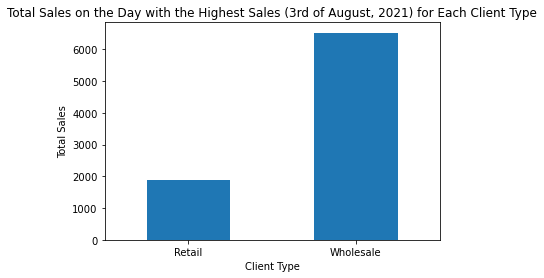

In [53]:
df_group5.plot(kind='bar')
plt.xlabel('Client Type')
plt.ylabel('Total Sales')
plt.title('Total Sales on the Day with the Highest Sales (3rd of August, 2021) for Each Client Type')
plt.xticks(rotation=0)
plt.gca().get_legend().remove()
plt.show()

**The bar graph shows the marked increase in wholesales for the day with the highest sales**

## Observations:
   * Transfer payment method had the highest number of quantity ordered among all the payment methods and also the highest number of sales.
   * Engine product line has the highest price per unit, but one of the lowest total sales, because of the low amount of engines ordered.
   * Suspension and traction product line had the highest total sales, this might be due to it also having the highest number of sales, despite its average unit price
   * Based on proportion of clients, 2/3rd of our clients are retail clients, but wholesale clients had the highest number of total sales and also the highest number of quantities ordered. This was expected, because wholesale clients buy in bigger bulks than retail clients. However further analysis showed that in the West warehouse region, there are more total sales by retail clients than wholesale clients, this requires more analysis with more information.
   * The central warehouse had the highest total sales among all 3 warehouses and also the highest quantity of products bought
   * The central warehouse also consistently had the highest total sales across all product lines, followed by the North warehouse and finally the West.
   * Comparing the correlation between unit price and total sales, to that between quantity and total sales, even though both unit price and quantity sold have a positive correlation with total sales, quantity sold of products sold had a bigger effect on total sales.
   * The top 2 highest sales by date were recorded on the 3rd of August, 15th of June and 7th of August 2021, in order of sales. Around the middle of each month, we see from the line graph that there's a peak of sales.
   * Analysis of the total sales by month shows that the month of August had the highest sales, then the month of June, and finally July. The month of August recorded the highest wholesales but also the lowest retail sales among all 3 months
   * The days with the lowest total sales, have very low or no wholesales for that day, and the days with the highest total sales, have the highest wholesales in the dataset.

## Recommendations:
   * The highest sales are from wholesalers in all regions except the west, where retailer total sales exceed wholesale total sales, resulting in a decrease in total product sales in that region. Based on this finding, we will recommend that the company's marketing department create more awareness in this region, specifically among wholesalers in this region and others.
   * Also, in other to promote sales, discounts can be offered on a specific amount of product purchased for the following month, particularly near the end of the month when product sales are low.